main
    |__ camera calibrator 
    |        |__ get camera error in text(print out text of camera error in .bnpz)
    |        |__ read .Bnpz
    |
    |__ marker detector (video --> array of markers name and position)
    |        |__ read video
    |        |__ read images sequence?
    |        |__ treshold an image (rgb image --> binary image)
    |        |__ centroid finder
    |        |__ openpose
    |        |__ marker identifier (match appeared makers with openpose keypoints to ID them)
    |        |__ centroid tracking
    |
    |__ angle predicter system (array of markers name and position --> angle of knee hip and ankle)
    |        |__ training system (data --> model)
    |        |       |__ read csv (Vicon walking data.csv --> array of Vicon organs angle)
    |        |       |__ Nural Network 
    |        |                |__ input: array of markers name and position
    |        |                |__ target: Vicon organs angle
    |        |                |__ output: model
    |        |__ angle predicter (array of markers name and position + medel --> angle of knee hip and ankle)
    |
    |__ display
             |__ excel file of predicted angle
             |__ cool video
                     |__ draw
                             |__ image pixle scale
                             |__ contours
                             |__ text in image
                             |__ draw coordinate
                     


In [1]:
#import lib
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist
from collections import OrderedDict

In [2]:
#globle param
isWriteVideo = 0


In [9]:
#main
a = []

MR =DotsCoorReader()
ct = CentroidTracker(40)
KADM = KeypointsAndDotsMatcher()

#cap = cv2.VideoCapture("C:\\Users\sunny.DESKTOP-QGFGEEK\Desktop\GitClone\\1_camera_gait_analysis\\tester\\adotonatable2.mp4")
cap = cv2.VideoCapture("C:\\Users\sunny.DESKTOP-QGFGEEK\Desktop\GitClone\\1_camera_gait_analysis\\tester\\Sunny_Walker7.mp4")
ret, frame, = cap.read()
vid_writer = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame.shape[1],frame.shape[0]))
MR.initOpenPose("COCO")
print(cap.get(cv2.CAP_PROP_FPS))

while(cap.isOpened()):
    ret, frame, = cap.read()
    if ret:
        contourCoor = MR.readContoursCoor(frame,170)
        objects = ct.update(contourCoor)
        #keypoint = MR.readKeypoints(frame,isDraw = 1)
        #print(keypoint)
        
        
        
        markersID = []
        #display tracking
        #print(objects)
        for (objectID, centroid) in objects.items():
            # draw both the ID of the object and the centroid of the
            # object on the output frame
            text = "ID {}".format(objectID)
            cv2.putText(frame, text, (centroid[0] - 10, centroid[1] - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0),2)
            cv2.circle(frame, (centroid[0], centroid[1]), 4, (0, 255, 0), -1)
            #print(objectID)
            #print(centroid)
            markersID.append([objectID,centroid[0],centroid[1]])
        
        for c in contourCoor:
                cv2.circle(frame,c, 5, (0,0,255), -1)
        
 #       kneeCoor = KADM.findCoreMarker(markersID,KADM.impKeypoints(keypoint),4)
#        if kneeCoor is not None:
#            if len(a) is 0:
#                a.append([kneeCoor[0],1])
#            else:
 #               isNew = 1
 #               highest = a[0][1]
  #              highestIndex = 0
  #              for i in range(len(a)):
   #                 if a[i][0] is kneeCoor[0] :
   #                     a[i][1]+=1
   #                     isNew = 0
   #                 if a[i][1] > highest:
   #                     highest = a[i][1]
   #                     highestIndex = a[i][0]
   #             if isNew:
  #                  a.append([kneeCoor[0],1])
  #          print(highestIndex)
    
  #          cv2.circle(frame,(markersID[highestIndex][1],markersID[highestIndex][2]), 8, (148, 0, 211), -1)
        
        
        
        
        #Save video
        if(isWriteVideo):
            vid_writer.write(frame)
        
        
        cv2.imshow("frame", MR.thresh)
        
        
        key = cv2.waitKey(100)
        if key == 27:
            break
    else: 
        break
cap.release()
cv2.destroyAllWindows()



Load COCO model successfully
Openpose initial successfully
30.0


Load COCO model successfully
Openpose initial successfully
[(357, 871), (367, 965), (334, 1105)]


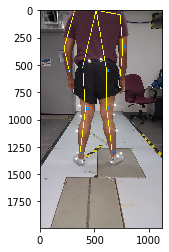

In [139]:
#main2
MR =DotsCoorReader()
frame = cv2.imread("C:\\Users\sunny.DESKTOP-QGFGEEK\Desktop\GitClone\\1_camera_gait_analysis\Azmall_image\BAzmall.jpg")
MR.initOpenPose(frame,"COCO")
contourCoor = MR.readContoursCoor(frame,210)
keypoint = MR.readKeypoints(frame,isWriteVideo = 0)
ad = KeypointsAndDotsMatcher()
f = ad.impKeypoints(keypoint)
print(ad.threeClosDots(contourCoor,f,4,1))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [3]:
class MarkersData:
    """Create table of Markers Data"""
   
    #crate list of data when initial the object
    def __init__(self):
        # [frame LASIx LASIy RASIx RASIy LPSIx LPSIy RPSIx RPSIy LTHIx LTHIy RTHIx RTHIy LKNEx LKNEy RKNEx RKNEy LTIBx LTIBy RTIBx RTIBy LANKx LANKy RANKx RANKy LTOEx LTOEy RTOEx RTOEy LHEEx LHEEy RHEEx RHEEy]
        #[ 0        1        2       3        4        5       6       7        8       9       10      11       12      13       14      15       16       17      18     19      20      21       22       23       24       25       26      27       28       29       30      31       32   ]
        self.markers = []
    
    #
    #def
    

In [4]:
class KeypointsAndDotsMatcher:
    """Match dots with keypoints by comparing both arrays"""
    
    def __init__(self):
        self.direction = 1

    #extract important keypoints out of COCO keypoints
    #i = 8: right hip, i = 9: right knee, i = 10: right ankle
    #i = 11: left hip, i = 12: left knee, i = 13: left ankle
    def impKeypoints(self,keypoints):
        self.keypoints = keypoints
        self.impkeypoints = []
        for i in range(len(self.keypoints)):
            if(i >7 and i<14): 
                self.impkeypoints.append(self.keypoints[i])

        return self.impkeypoints
    
    #find knee hip and ankle marker from important keypoints and tracked contours
    #return 
    #impkeypoints 0 = right hip ,1 = right knee, 2 = right ankle, 3 = left hip, 4 = left knee, 5 = left ankle
    def findCoreMarker(self,markersID,impkeypoints,impkeypointsindex):
        self.Dis = []
        for i in range(len(markersID)):
            if impkeypoints[impkeypointsindex] is not None and impkeypoints[impkeypointsindex] is not None and markersID[i][1] is not None and markersID[i][2] is not None :
                self.Dis.append(self.Distance(impkeypoints[impkeypointsindex][0],impkeypoints[impkeypointsindex][1],markersID[i][1],markersID[i][2]))
        if len(self.Dis) > 0:
            self.closestMarkerID = self.Dis[0]
            for i in range(len(self.Dis)):
                if self.Dis[i]<=self.closestMarkerID:
                    self.closestMarkerID = self.Dis[i]
                    self.index1 = i
        
            return markersID[self.index1]
        else:
            return None
    
    
    
    
    
    
    
    #find closest 3 dots 
    #return list of dots coordinate sorted in low to high
    #impkeypoints 0 = right hip ,1 = right knee, 2 = right ankle, 3 = left hip, 4 = left knee, 5 = left ankle
    #direction 1 to sort verticle
    #direction 0 to sort horiz0ntal
    def threeClosDots(self,coor,impkeypoints,impkeypointsindex,direction):
        self.coor = coor
        self.impkeypoints = impkeypoints
        self.impkeypointsindex = impkeypointsindex
        self.direction = direction
        self.Dis = []
        for i in range(len(self.coor)):
            self.Dis.append(self.Distance(self.impkeypoints[self.impkeypointsindex][0],self.impkeypoints[self.impkeypointsindex][1],self.coor[i][0],self.coor[i][1]))
        #print(RightKneeDis)
        self.dot1_val = self.Dis[0]
        for i in range(len(self.Dis)):
            if self.Dis[i]<=self.dot1_val:
                self.dot1_val = self.Dis[i]
                self.index1 = i
        self.dot2_val = self.Dis[0]
        for i in range(len(self.Dis)):
            if self.Dis[i]>self.dot1_val and self.Dis[i]<=self.dot2_val:
                self.dot2_val = self.Dis[i]
                self.index2 = i
        self.dot3_val = self.Dis[0]
        for i in range(len(self.Dis)):
            if self.Dis[i]>self.dot2_val and self.Dis[i]<=self.dot3_val:
                self.dot3_val = self.Dis[i]
                self.index3 = i    

        self.impcoor = [self.coor[self.index1],self.coor[self.index2],self.coor[self.index3],]
        if self.direction:    
            Sort(self.impcoor)
        else:
            self.impcoor.sort()

        #cv2.circle(frame,impcoor[0], 20, (0,255,255), -1)
        #cv2.circle(frame,impcoor[1], 20, (0,255,0), -1)
        #cv2.circle(frame,impcoor[2], 20, (255,0,0), -1)
        return self.impcoor
    
    #find distance between two points
    def Distance(self,x1,y1,x2,y2):
        output = math.sqrt(math.pow((x1-x2),2) + math.pow(y1-y2,2))
        return output


In [5]:
class CentroidTracker():
    def __init__(self, maxDisappeared=120):
        # initialize the next unique object ID along with two ordered
        # dictionaries used to keep track of mapping a given object
        # ID to its centroid and number of consecutive frames it has
        # been marked as "disappeared", respectively
        self.nextObjectID = 0
        self.objects = OrderedDict()
        self.disappeared = OrderedDict()

        # store the number of maximum consecutive frames a given
        # object is allowed to be marked as "disappeared" until we
        # need to deregister the object from tracking
        self.maxDisappeared = maxDisappeared

    def register(self, centroid):
        # when registering an object we use the next available object
        # ID to store the centroid
        self.objects[self.nextObjectID] = centroid
        self.disappeared[self.nextObjectID] = 0
        self.nextObjectID += 1

    def deregister(self, objectID):
        # to deregister an object ID we delete the object ID from
        # both of our respective dictionaries
        del self.objects[objectID]
        del self.disappeared[objectID]

    def update(self, coor):
        # check to see if the list of input coordinate
        # is empty
        if len(coor) == 0:
            # loop over any existing tracked objects and mark them
            # as disappeared
            for objectID in list(self.disappeared.keys()):
                self.disappeared[objectID] += 1

                # if we have reached a maximum number of consecutive
                # frames where a given object has been marked as
                # missing, deregister it
                if self.disappeared[objectID] > self.maxDisappeared:
                    self.deregister(objectID)

            # return early as there are no centroids or tracking info
            # to update
            return self.objects

        # initialize an array of input centroids for the current frame
        inputCentroids = np.zeros((len(coor), 2), dtype="int")

        # loop over the bounding box rectangles
        i=0
        while(i<int(len(coor))):
            # use the bounding box coordinates to derive the centroid
            cX = int(coor[i][0])
            cY = int(coor[i][1])
            inputCentroids[i] = (cX, cY)
            i+=1

        # if we are currently not tracking any objects take the input
        # centroids and register each of them
        if len(self.objects) == 0:
            for i in range(0, len(inputCentroids)):
                self.register(inputCentroids[i])

        # otherwise, are are currently tracking objects so we need to
        # try to match the input centroids to existing object
        # centroids
        else:
            # grab the set of object IDs and corresponding centroids
            objectIDs = list(self.objects.keys())
            objectCentroids = list(self.objects.values())

            # compute the distance between each pair of object
            # centroids and input centroids, respectively -- our
            # goal will be to match an input centroid to an existing
            # object centroid
            D = dist.cdist(np.array(objectCentroids), inputCentroids)

            # in order to perform this matching we must (1) find the
            # smallest value in each row and then (2) sort the row
            # indexes based on their minimum values so that the row
            # with the smallest value as at the *front* of the index
            # list
            rows = D.min(axis=1).argsort()

            # next, we perform a similar process on the columns by
            # finding the smallest value in each column and then
            # sorting using the previously computed row index list
            cols = D.argmin(axis=1)[rows]

            # in order to determine if we need to update, register,
            # or deregister an object we need to keep track of which
            # of the rows and column indexes we have already examined
            usedRows = set()
            usedCols = set()

            # loop over the combination of the (row, column) index
            # tuples
            for (row, col) in zip(rows, cols):
                # if we have already examined either the row or
                # column value before, ignore it
                # val
                if row in usedRows or col in usedCols:
                    continue

                # otherwise, grab the object ID for the current row,
                # set its new centroid, and reset the disappeared
                # counter
                objectID = objectIDs[row]
                self.objects[objectID] = inputCentroids[col]
                self.disappeared[objectID] = 0

                # indicate that we have examined each of the row and
                # column indexes, respectively
                usedRows.add(row)
                usedCols.add(col)

            # compute both the row and column index we have NOT yet
            # examined
            unusedRows = set(range(0, D.shape[0])).difference(usedRows)
            unusedCols = set(range(0, D.shape[1])).difference(usedCols)

            # in the event that the number of object centroids is
            # equal or greater than the number of input centroids
            # we need to check and see if some of these objects have
            # potentially disappeared
            if D.shape[0] >= D.shape[1]:
                # loop over the unused row indexes
                for row in unusedRows:
                    # grab the object ID for the corresponding row
                    # index and increment the disappeared counter
                    objectID = objectIDs[row]
                    self.disappeared[objectID] += 1

                    # check to see if the number of consecutive
                    # frames the object has been marked "disappeared"
                    # for warrants deregistering the object
                    if self.disappeared[objectID] > self.maxDisappeared:
                        self.deregister(objectID)

            # otherwise, if the number of input centroids is greater
            # than the number of existing object centroids we need to
            # register each new input centroid as a trackable object
            else:
                for col in unusedCols:
                    self.register(inputCentroids[col])

        # return the set of trackable objects
        return self.objects

In [6]:
class DotsCoorReader:
    """Read coordinate of markers and human keypoints"""
    
    def __init__(self):
        self.OPthreshold = 0.1
        self.isModelLoaded = 0
        
        
    #threshLevel 0 - 254
    #return list of contours coordinate   
    def readContoursCoor(self,frame,threshLevel = 250):
        self.frame = frame
        self.threshLevel = threshLevel
        self.contoursCoor = []
        #convert color image to grayscale image
        self.imgray = cv2.cvtColor(self.frame,cv2.COLOR_BGR2GRAY)
        #blur the grayscale image
        self.imblur1 = cv2.medianBlur(self.imgray,5)
        #blur the grayscale image
        self.imblur2 = cv2.GaussianBlur(self.imblur1,(5,5),0)
        #convert the grayscale image to binary image
        self.ret,self.thresh = cv2.threshold(self.imblur1,threshLevel,255,cv2.THRESH_BINARY)
        #find contours of the binary image
        self.contours, self.hierarchy = cv2.findContours(self.thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        i = 0
        for c in self.contours:
            # calculate moments for each contour
            M = cv2.moments(c)
            # calculate x,y coordinate of center
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX = 0
                cY = 0
            #add list of new coordinate to the previous one
            self.contoursCoor.append((cX,cY))
            i+=1
        return self.contoursCoor
    
    #initail openpose 
    def initOpenPose(self,MODE = "COCO"):
        self.frame = frame
        self.isModelLoaded = 1
        self.MODE = MODE
        if self.MODE is "COCO":
            self.protoFile = "C:\\Users\sunny.DESKTOP-QGFGEEK\Desktop\GitClone\\1_camera_gait_analysis\OpenPose\OpenPose\pose\coco\pose_deploy_linevec.prototxt"
            self.weightsFile = "C:\\Users\sunny.DESKTOP-QGFGEEK\Desktop\GitClone\\1_camera_gait_analysis\OpenPose\OpenPose\pose\coco\pose_iter_440000.caffemodel"
            self.nPoints = 18
            self.POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]
            print("Load COCO model successfully")

        elif self.MODE is "MPI" :
            self.protoFile = "C:\\Users\sunny.DESKTOP-QGFGEEK\Desktop\GitClone\\1_camera_gait_analysis\OpenPose\OpenPose\pose\mpi\pose_deploy_linevec_faster_4_stages.prototxt"
            self.weightsFile = "C:\\Users\sunny.DESKTOP-QGFGEEK\Desktop\GitClone\\1_camera_gait_analysis\OpenPose\OpenPose\pose\mpi\pose_iter_160000.caffemodel"
            self.nPoints = 15
            self.POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]  
            print("Load MPI model successfully")
           
        else: 
            print("MODE must be COCO or MPI")
            self.isModelLoaded = 0
            
        if(self.isModelLoaded):
            
            self.net = cv2.dnn.readNetFromCaffe(self.protoFile,self.weightsFile)
            self.inWidth = 368
            self.inHeight = 368       
            print("Openpose initial successfully")
    
    #return list of keypoint
    def readKeypoints(self,frame,OPthreshold = 0.1,isDraw = 1):
        if(self.isModelLoaded):
            self.frame = frame
            self.isDraw = isDraw
            self.isWriteVideo  = isWriteVideo 
            self.frameWidth = self.frame.shape[1]
            self.frameHeight = self.frame.shape[0]
            self.OPthreshold = OPthreshold
            self.inpBlob = cv2.dnn.blobFromImage(self.frame, 1.0 / 255, (self.inWidth, self.inHeight),(0, 0, 0), swapRB=False, crop=False)
            
            self.net.setInput(self.inpBlob)
            
            self.output = self.net.forward()
            self.H = self.output.shape[2]
            self.W = self.output.shape[3]
            
            # Empty list to store the detected keypoints
            self.points = []
            for i in range(self.nPoints):
                # confidence map of corresponding body's part.
                self.probMap = self.output[0, i, :, :]

                # Find global maxima of the probMap.
                self.minVal, self.prob, self.minLoc, self.point = cv2.minMaxLoc(self.probMap)

                # Scale the point to fit on the original image
                self.x = (self.frameWidth * self.point[0]) / self.W
                self.y = (self.frameHeight * self.point[1]) / self.H

                if self.prob > self.OPthreshold : 
                    #Add keypoint to list
                    self.points.append((int(self.x), int(self.y)))
                else :
                    self.points.append(None)

            if(self.isDraw):
                # Draw dot and lebel
                for i in range(len(self.points)) :
                    if self.points[i] is not None:
                        cv2.circle(self.frame, self.points[i], 8, (255, 127, 0), thickness=-1, lineType=cv2.FILLED)
                        cv2.putText(self.frame, "{}".format(i), self.points[i], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 127, 0), 2, lineType=cv2.LINE_AA)
                
                
                # Draw Skeleton
                for pair in self.POSE_PAIRS:
                    self.partA = pair[0]
                    self.partB = pair[1]

                    if self.points[self.partA] and self.points[self.partB]:
                        cv2.line(self.frame, self.points[self.partA], self.points[self.partB], (0, 255, 255), 5)
            

                
            return self.points
        else:
            print("Please initial OPenpose")
            
    #def 

In [7]:
class CameraCalibrate:
    """Print out camera matrix, distortion coefficients, rotation and translation vectors in B.npz file."""
    
    def __init__(self):
        # termination criteria
        self.criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        # camera matrix
        self.mtx = 0 
        #distortion coefficients
        self.dist = 0
        #rotation vector
        self.rvecs = 0  
        #translation vector
        self.tvecs = 0
        self.isFindChessboard = 0
        
    #print out camera matrix, distortion coefficients, rotation and translation vectors in B.npz file.
    #videoID is video name or 0 for webcam    
    def getCameraErrorText(self,videoID):
        # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        self.objp = np.zeros((7*7,3), np.float32)
        self.objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
        # Arrays to store object points and image points from all the images.
        self.objpoints = [] # 3d point in real world space
        self.imgpoints = [] # 2d points in image plane.
        
        self.images = cv2.VideoCapture(videoID)
        self.isFindChessboard = 0
        while(self.images.isOpened()):
            self.ret, self.frame = self.images.read()
            if self.ret:
                self.gray = cv2.cvtColor(self.frame,cv2.COLOR_BGR2GRAY)

                # Find the chess board corners
                self.ret, self.corners = cv2.findChessboardCorners(self.gray, (7,7),None)

                 # If found, add object points, image points (after refining them)
                if self.ret == True:
                    self.isFindChessboard = 1
                    self.objpoints.append(self.objp)

                    cv2.cornerSubPix(self.gray,self.corners,(11,11),(-1,-1),self.criteria)
                    self.imgpoints.append(self.corners)

                    # Draw and display the corners
                    cv2.drawChessboardCorners(self.frame, (7,7), self.corners,self.ret)
                    self.ret, self.mtx, self.dist, self.rvecs, self.tvecs = cv2.calibrateCamera(self.objpoints, self.imgpoints, self.gray.shape[::-1],None,None)
                cv2.imshow('frame',self.frame)    
                key = cv2.waitKey(100)
                if key == 27:
                    break

            else: 
                break
        self.images.release()
        cv2.destroyAllWindows()
        if(self.isFindChessboard == 1):
            print("B.npz is saved!")
            np.savez("B.npz", mtx = self.mtx, dist = self.dist , rvecs = self.rvecs, tvecs = self.tvecs)
        else:
            print("Can not find chessboard!")
     
    #read B.npz file
    def readBnpzFile(self):
        self.data = np.load("B.npz")

        print('mtx: ')
        print(self.data['mtx'])

        print('dist: ')
        print(self.data['dist'])

        print('rvecs: ')
        print(self.data['rvecs'])

        print('tvecs: ')
        print(self.data['tvecs'])


In [8]:
# Python code to sort the tuples using second element  
# of sublist Inplace way to sort using sort() 
def Sort(sub_li): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: x[1]) 
    return sub_li 